In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import toolkit as tk
t,tau,w = symbols('t tau omega',real=True)
s = Symbol('s')
j = I
jw = j*w
init_printing()

In [2]:
# 1
solve(s**2+8*s+8)

In [3]:
# 3
y = Function('y')
H = 3*s/(s**2+6*s+9)
ics = {y(0):0, y(t).diff(t).subs(t,0):0}
tk.odeImpulse(H, ics).collect(exp(-3*t))


In [89]:
# 4
u = Heaviside(t)
ys = (1-exp(-t/tau))*u
Ys = laplace_transform(ys, t, s)[0]
yd = inverse_laplace_transform(Ys*s, s, t)
yr = inverse_laplace_transform(Ys/s, s, t)
yd.collect(u),yr.collect(u)

In [5]:
# Alternativ løsning for min psykiske helse
tau0 = Symbol('tau_0',real=True)
integrate(ys.subs(t,tau0),(tau0,0,t)).collect(u)

In [35]:
# Fourer-transformation
u = Heaviside(t)
x = 2*exp(-3*t)*u
res1 = (laplace_transform(x.diff(t),t,s)[0].subs(s,jw)).simplify()

In [37]:
(res1 - (1/jw*2/(jw+3))).expand()

In [16]:
x = 4*exp(-6*t)*u
laplace_transform(x,t,s)[0].subs(s,jw).simplify()

In [19]:
(2/(jw/2+3)).simplify()

In [22]:
x = 2*exp(-3*(1-j)*t)*u
laplace_transform(x,t,s)[0].subs(s,jw).simplify().collect(j)

In [39]:
H = 9/(s+9)
tk.ROC(H)

In [43]:
apart(H/s,s)

In [44]:
tk.step(H)

In [53]:
y = Function('y')
x = Function('x')
ode = Eq(y(t).diff(t,2) + 6*y(t).diff(t) + 9*y(t), x(t))
ics = {y(0):1, y(t).diff(t).subs(t,0):-3}
zi = tk.lap_with_ic(ode, ic=ics,tf_out=0)
(zi*s).simplify()

In [55]:
tk.ROC(tk.ode2tf(ode))

In [57]:
damp = 0.1
wn = 20*pi
H = 1/(s**2 + 2*damp*wn*s + wn**2)
tk.step_info(H)

{'Overshoot': 72.9247614287671,
 'Peak Time': 0.0502518907629606,
 'Settling Time': 0.636619772367581,
 'Rise Time': 0.0157165506303247,
 'Delay Time': 0.0177806310872835}

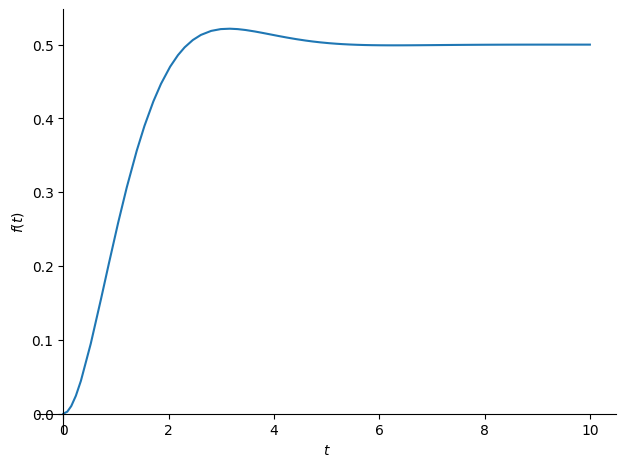

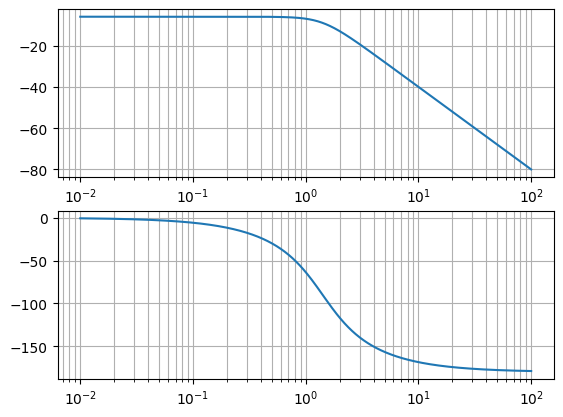

In [77]:
r_A = -1.+j
A = 1/((s-r_A)*(s-conjugate(r_A)))
plot(tk.step(A),(t,0,10))
tk.bode(A,pltrange=(-2,2))

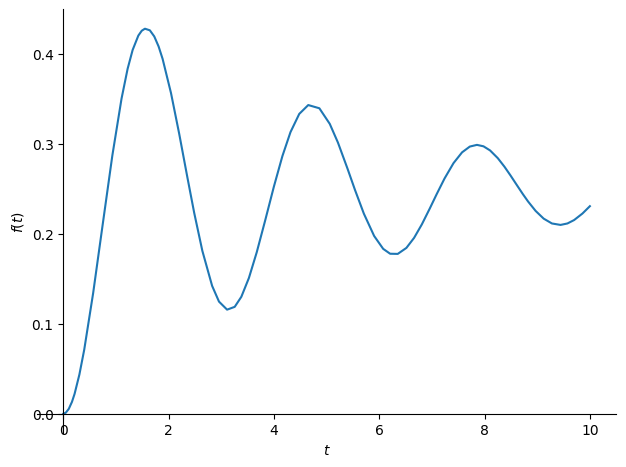

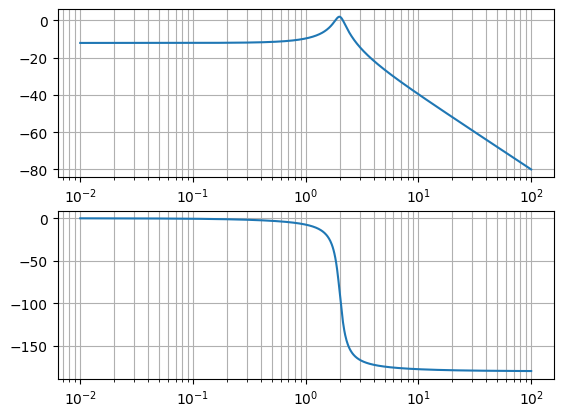

In [79]:
r_D = -0.2+2*j
D = 1/((s-r_D)*(s-conjugate(r_D)))
plot(tk.step(D),(t,0,10))
tk.bode(D,pltrange=(-2,2))

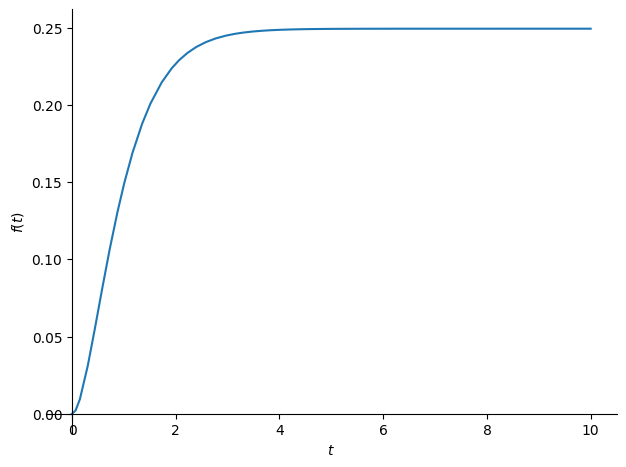

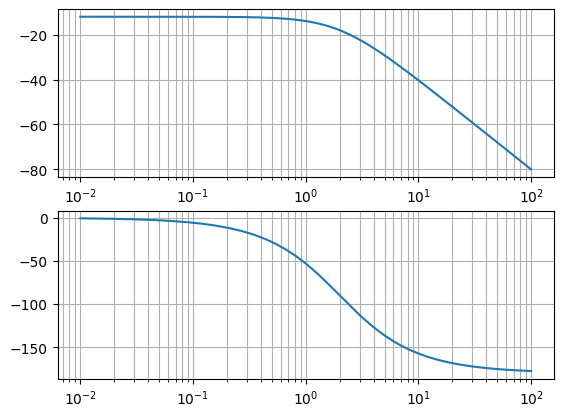

In [88]:
r_G = -2.+0.1*j
G = 1/((s-r_G)*(s-conjugate(r_G)))
plot(tk.step(G),(t,0,10))
tk.bode(G,pltrange=(-2,2))

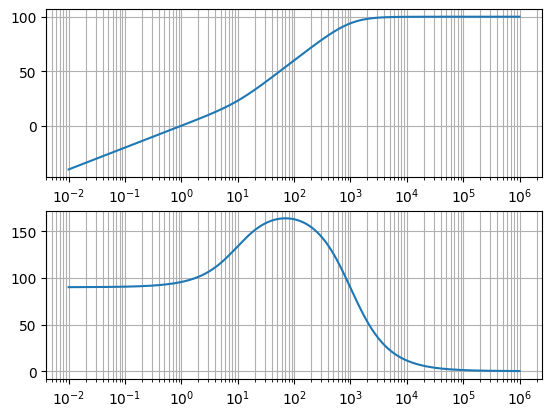

In [85]:
P = s/1*(s/10+1)
Q = (s/1000+1)**2
H = cancel(P/Q)
tk.bode(H,pltrange=(-2,6))

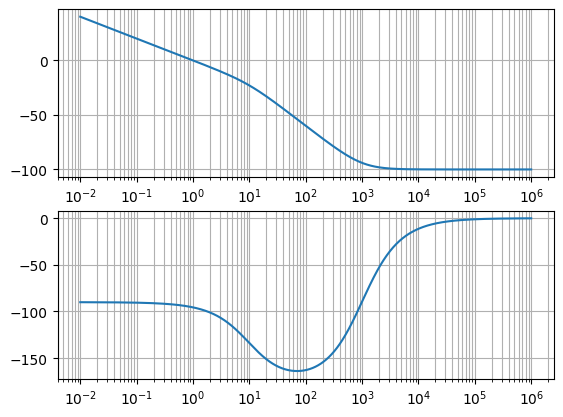

In [86]:
P = s/1*(s/10+1)
Q = (s/1000+1)**2
H = cancel(Q/P)
tk.bode(H,pltrange=(-2,6))

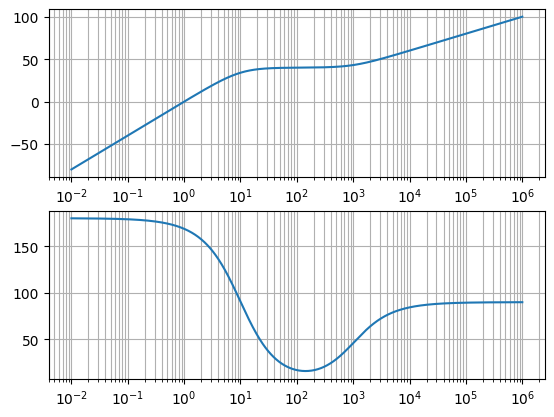

In [87]:
P = (s/1)**2*(s/1000+1)
Q = (s/10+1)**2
H = cancel(P/Q)
tk.bode(H,pltrange=(-2,6))

In [91]:
R1,R2,C = symbols('R_1 R_2 C')
Q = sqrt(R1*R2*C*C)/(R2*(C+C))
tk.sensitivity(Q,R1),tk.sensitivity(Q,R2)